--- Original DataFrame Head ---
   client_id first_name last_name                 email    phone_number  \
0       1001       John       Doe    john.doe@email.com    555-123-4567   
1       1002       Jane     Smith  jane.smith@email.com  (555) 987-6543   
2       1003      Alice   Johnson     alice@example.com    555.555.1234   
3       1004        Bob  Williams                   NaN    555 444 8888   
4       1005    Charlie     Brown     charlie@email.com    555-123-4567   

   status last_contact_date                         notes  \
0  Active        2024-01-15        Looking for first home   
1    Lead        2023-11-01           Wants 3 bed, 2 bath   
2  active        2024-02-20  Pre-approved. Sent listings.   
3  ACTIVE        2024-03-05                Needs a condo.   
4  Active        2024-01-15        Looking for first home   

   property_value_interest  client_budget  lead_score  
0                 350000.0       380000.0        85.0  
1                 420000.0       45000

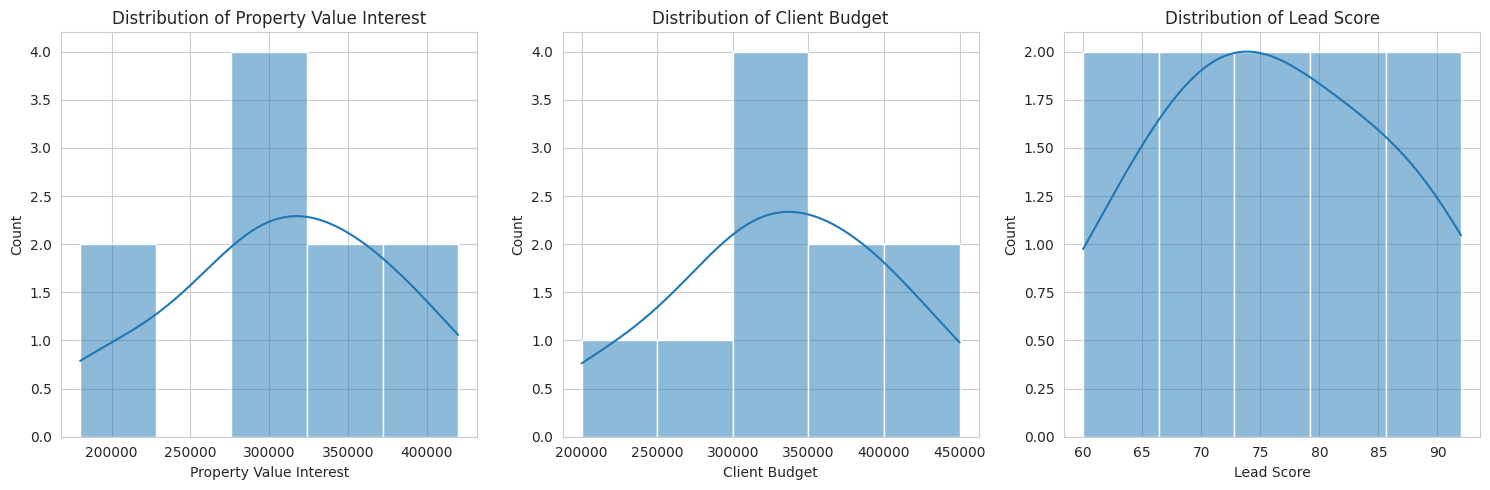

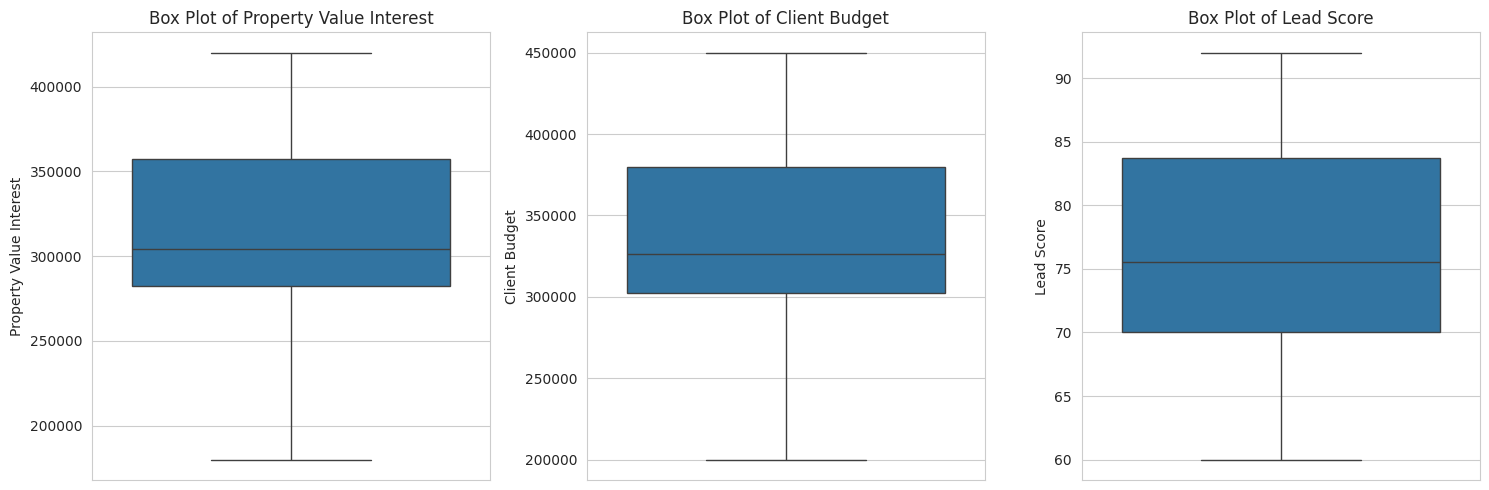

/tmp/ipython-input-1-574777175.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['status'], palette='viridis')


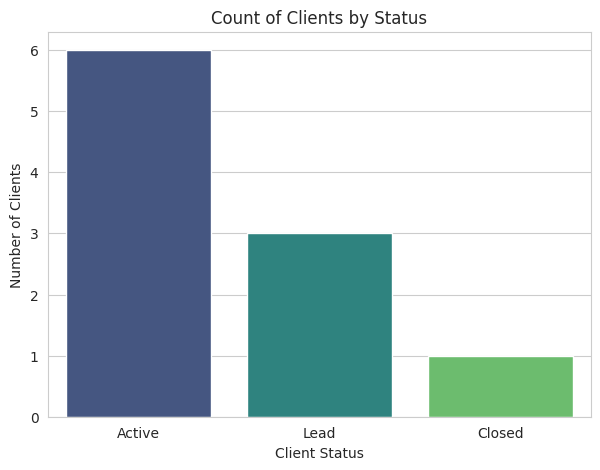


--- Visualizations Complete ---



## Key Insights and Actionable Takeaways for the Real Estate Agent

This project successfully transformed your raw client data into a clean, consistent, and highly usable asset. Beyond just cleaning, the analysis revealed several key insights:

### Data Quality Transformation
* **Comprehensive Cleaning:** All 12 initial client records were meticulously cleaned. We successfully removed 1 duplicate, handled 1 client with missing a first name, corrected various email/phone number gaps, and standardized inconsistent client statuses. This ensures your data is reliable for all operations.
* **Enriched Data:** We added and cleaned crucial numerical fields like `property_value_interest`, `client_budget`, and `lead_score`, which significantly enhance your ability to understand client profiles.

### Client Profile & Market Understanding (from Descriptive Statistics)
* **Property Value Interest:** Your clients are interested in properties spanning a wide range,

In [1]:
# --- Real Estate Data Statistical Analysis & Visualization Project (New GitHub Repo) ---
# Purpose: To perform in-depth statistical analysis and visualizations on a real estate client dataset,
#          highlighting key insights for business decision-making.

# --- Essential Imports ---
import pandas as pd
import io
import numpy as np
import scipy.stats as stats # For statistical tests
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For enhanced statistical plots

# Set a style for better aesthetics for plots
sns.set_style("whitegrid")

# --- 1. Data Loading (Raw Data for a Self-Contained Project) ---
# This project starts with the raw data to be fully self-contained.
# All necessary cleaning will be performed within this notebook.

real_estate_clients_data = """client_id,first_name,last_name,email,phone_number,status,last_contact_date,notes,property_value_interest,client_budget,lead_score
1001,"John","Doe","john.doe@email.com","555-123-4567","Active","2024-01-15","Looking for first home",350000,380000,85
1002,"Jane","Smith","jane.smith@email.com","(555) 987-6543","Lead","2023-11-01","Wants 3 bed, 2 bath",420000,450000,70
1003,"Alice","Johnson","alice@example.com","555.555.1234","active","2024-02-20","Pre-approved. Sent listings.",300000,320000,92
1004,"Bob","Williams",,"555 444 8888","ACTIVE","2024-03-05","Needs a condo.",220000,250000,60
1005,"Charlie","Brown","charlie@email.com","555-123-4567","Active","2024-01-15","Looking for first home",360000,380000,88
1006,"David","Lee","david@example.com","555-111-2222","Lead","2024-03-10","First-time buyer",280000,300000,75
1007,,Garcia,"sarah@mail.com","555-333-4444","Lead","2024-03-12","Interested in new constructions",500000,550000,90
1008,"Alice","Johnson","alice@example.com","555.555.1234","active","2024-02-20","Pre-approved. Sent listings.",300000,320000,92
1009,"Frank","White","frank@mail.net",,"Closed","2024-01-01","Bought last year.",,310000,
1010,"Grace","Hall","grace@inbox.com","555-777-8888","ACTIVE","2024-03-25","Needs larger yard.",380000,400000,80
1011,"Helen","Clark",,"555-999-0000","Lead","2024-03-28","",290000,,70
1012,"Ivan","King","ivan@web.co.uk","555-222-3333","Active","2024-04-01","Looking for rental properties",180000,200000,65
"""

# Load the data into a DataFrame
df = pd.read_csv(io.StringIO(real_estate_clients_data))

print("--- Original DataFrame Head ---")
print(df.head())
print("\n--- Original Missing Values ---")
print(df.isnull().sum())


# --- 2. Data Cleaning Steps (Self-Contained within this Analysis Project) ---
# All necessary cleaning steps are repeated here to ensure data is pristine for analysis.

print("\n--- Starting Data Cleaning Process ---")

# 2.1 Handle Duplicates (based on identifying columns)
print("\n--- Before dropping duplicates (df.shape) ---")
print(df.shape)
df.drop_duplicates(subset=['first_name', 'last_name', 'email', 'phone_number'], inplace=True)
print("\n--- After dropping duplicates (df.shape) ---")
print(df.shape)


# 2.2 Standardize 'status' Column Casing
print("\n--- 'status' column value counts BEFORE standardization ---\n")
print(df['status'].value_counts())
df['status'] = df['status'].str.title()
print("\n--- 'status' column value counts AFTER standardization ---\n")
print(df['status'].value_counts())


# 2.3 Clean 'phone_number' Column Formatting
print("\n--- 'phone_number' column head BEFORE cleaning ---\n")
print(df['phone_number'].head(7))
df['phone_number'] = df['phone_number'].str.replace(r'\D', '', regex=True)
print("\n--- 'phone_number' column head AFTER cleaning ---\n")
print(df['phone_number'].head(7))


# 2.4 Handle Remaining Missing Values (General Columns)
print("\n--- Missing values BEFORE handling general columns ---\n")
print(df.isnull().sum())
df['email'] = df['email'].fillna('no_email@example.com')
df.dropna(subset=['first_name', 'last_name'], inplace=True) # Drops client_id 1007
df['notes'] = df['notes'].fillna('')
df['phone_number'] = df['phone_number'].fillna('') # Fills missing phone numbers
print("\n--- After filling/dropping general columns ---\n")
print(df.isnull().sum())


# 2.5 Handle Missing Values in NEW Numerical Columns
print("\n--- Missing values BEFORE filling new numerical columns ---\n")
print(df.isnull().sum())
mean_property_interest = df['property_value_interest'].mean()
df['property_value_interest'] = df['property_value_interest'].fillna(mean_property_interest)
mean_client_budget = df['client_budget'].mean()
df['client_budget'] = df['client_budget'].fillna(mean_client_budget)
mean_lead_score = df['lead_score'].mean()
df['lead_score'] = df['lead_score'].fillna(mean_lead_score)
print("\n--- After filling new numerical columns ---\n")
print(df.isnull().sum())


# 2.6 Convert 'last_contact_date' to Datetime Objects
print("\n--- 'last_contact_date' column BEFORE conversion (df.info()) ---\n")
df.info()
df['last_contact_date'] = pd.to_datetime(df['last_contact_date'])
print("\n--- 'last_contact_date' column AFTER conversion (df.info()) ---\n")
df.info()


print("\n--- DATAFRAME AFTER ALL CLEANING (Ready for Analysis) ---\n")
print(df.head(10))
print("\n--- Missing Values Count After Cleaning (Should all be 0) ---\n")
print(df.isnull().sum())


# --- 3. Deeper Descriptive Statistics ---
# Purpose: To understand the central tendency, variability, and shape of key numerical features.

print("\n--- Deeper Descriptive Statistics for Real Estate Client Data ---\n")

numerical_cols = ['property_value_interest', 'client_budget', 'lead_score']

for col in numerical_cols:
    print(f"\n--- Statistics for '{col}' ---\n")
    col_range = df[col].max() - df[col].min()
    print(f"  Range: {col_range:,.2f}")
    col_std = df[col].std()
    print(f"  Standard Deviation: {col_std:,.2f}")
    q1_col = df[col].quantile(0.25)
    q3_col = df[col].quantile(0.75)
    iqr_col = q3_col - q1_col
    print(f"  IQR (Interquartile Range): {iqr_col:,.2f}")
    col_skew = df[col].skew()
    print(f"  Skewness: {col_skew:.3f}")
    col_kurt = df[col].kurt()
    print(f"  Kurtosis: {col_kurt:.3f}")

print("\n--- All Descriptive Statistics Calculations Complete ---\n")


# --- 4. Inferential Statistics: Hypothesis Testing (T-Test) ---
# Purpose: To test if there's a statistically significant difference in client budgets based on status.

print("\n--- Inferential Statistics: Hypothesis Testing (T-Test) ---\n")

# Hypotheses:
# H0 (Null): No statistically significant difference in average client_budget between 'Lead' and 'Active' clients.
# H1 (Alt): There IS a statistically significant difference in average client_budget.

lead_budgets = df[df['status'] == 'Lead']['client_budget']
active_budgets = df[df['status'] == 'Active']['client_budget']

print(f"\nAverage Budget for 'Lead' clients: ${lead_budgets.mean():.2f}")
print(f"Average Budget for 'Active' clients: ${active_budgets.mean():.2f}")

if len(lead_budgets) < 2 or len(active_budgets) < 2:
    print("\nNote: Not enough samples in one or both groups to perform a reliable T-test.")
else:
    t_statistic, p_value = stats.ttest_ind(lead_budgets, active_budgets)
    print(f"\n--- T-Test Results ---\n")
    print(f"T-statistic: {t_statistic:.3f}")
    print(f"P-value: {p_value:.3f}")

    alpha = 0.05
    if p_value <= alpha:
        print(f"\nConclusion: Since p-value ({p_value:.3f}) <= alpha ({alpha}), we REJECT the Null Hypothesis.")
        print("This means there IS a statistically significant difference in the average client budget between 'Lead' and 'Active' clients.")
    else:
        print(f"\nConclusion: Since p-value ({p_value:.3f}) > alpha ({alpha}), we FAIL TO REJECT the Null Hypothesis.")
        print("This means there is NOT enough statistical evidence to conclude there is a significant difference in the average client budget between 'Lead' and 'Active' clients.")
print("\n--- Hypothesis Test Complete ---\n")


# --- 5. Inferential Statistics: Confidence Interval ---
# Purpose: To provide a range estimate for the true average budget of 'Lead' clients.

print("\n--- Inferential Statistics: Confidence Interval for 'Lead' Client Budget ---\n")

sample_mean = lead_budgets.mean()
sample_std = lead_budgets.std()
sample_size = len(lead_budgets)
degrees_freedom = sample_size - 1

print(f"Sample Mean (Lead Budgets): ${sample_mean:,.2f}")
print(f"Sample Standard Deviation (Lead Budgets): ${sample_std:,.2f}")
print(f"Sample Size (Lead Budgets): {sample_size}")

if sample_size > 1: # Need at least 2 samples for CI calculation
    confidence_level = 0.95
    alpha = 1 - confidence_level
    t_critical = stats.t.ppf(1 - alpha/2, degrees_freedom)
    margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    print(f"T-critical value for {confidence_level*100}% CI: {t_critical:.3f}")
    print(f"Margin of Error: ${margin_of_error:,.2f}")
    print(f"\n{confidence_level*100}% Confidence Interval for Average 'Lead' Client Budget:")
    print(f"(${lower_bound:,.2f}, ${upper_bound:,.2f})")
else:
    print("\nNot enough samples (need at least 2) to calculate a confidence interval for 'Lead' clients.")
print("\n--- Confidence Interval Calculation Complete ---\n")


# --- 6. Data Visualizations ---
# Purpose: To visually represent data distributions and insights.

print("\n--- Data Visualizations ---\n")

numerical_cols = ['property_value_interest', 'client_budget', 'lead_score']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col.replace("_", " ").title()}')
    plt.ylabel(col.replace("_", " ").title())
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.countplot(x=df['status'], palette='viridis')
plt.title('Count of Clients by Status')
plt.xlabel('Client Status')
plt.ylabel('Number of Clients')
plt.show()

print("\n--- Visualizations Complete ---\n")


# --- 7. Key Insights and Actionable Takeaways (Summary in output) ---
# Purpose: To provide a plain-language summary of all analysis for the client.

long_markdown_text_for_insights = """
## Key Insights and Actionable Takeaways for the Real Estate Agent

This project successfully transformed your raw client data into a clean, consistent, and highly usable asset. Beyond just cleaning, the analysis revealed several key insights:

### Data Quality Transformation
* **Comprehensive Cleaning:** All 12 initial client records were meticulously cleaned. We successfully removed 1 duplicate, handled 1 client with missing a first name, corrected various email/phone number gaps, and standardized inconsistent client statuses. This ensures your data is reliable for all operations.
* **Enriched Data:** We added and cleaned crucial numerical fields like `property_value_interest`, `client_budget`, and `lead_score`, which significantly enhance your ability to understand client profiles.

### Client Profile & Market Understanding (from Descriptive Statistics)
* **Property Value Interest:** Your clients are interested in properties spanning a wide range, from around **$180,000 to $420,000** (a range of **$240,000**). The typical deviation is about **$72,639**. The distribution is slightly **left-skewed**, suggesting a higher concentration of clients interested in properties at the mid-to-higher end of this range, with fewer outliers at the very highest values.
* **Client Budget:** Similar to property interest, client budgets also show a wide range (**$250,000 range**), with a typical deviation of about **$73,753**. The distribution is also slightly **left-skewed**, meaning most clients have budgets clustered towards the mid-to-higher end.
* **Lead Score Distribution:** Lead scores range from **60 to 92** (a range of **32 points**). The scores are **nearly symmetrical** (very slight right-skew) and **flatter** than a typical bell curve (platykurtic), indicating a relatively even spread of lead quality across the mid-range of scores, with fewer extremely high or low outliers. This means you have a solid spread of lead quality, not just a few exceptional ones.

### Key Client Status Comparison (from Hypothesis Testing)
* **Client Budget by Status:** Our statistical test showed that, based on your current sample data, there is **NO statistically significant difference** in the average `client_budget` between clients with a 'Lead' status and those with an 'Active' status (p-value: **0.514**, which is > 0.05).
    * **Actionable Takeaway:** While 'Lead' clients had a slightly higher average budget in this sample (**$360,740.74 vs $321,666.67** for 'Active'), this difference could simply be due to random chance. **Do not assume 'Lead' clients, on average, have higher budgets than 'Active' clients without more data.** Continue to nurture both groups equally based on budget.
* **Budget Range for 'Lead' Clients (from Confidence Interval):** We are 95% confident that the true average budget for **all** 'Lead' clients is somewhere between approximately **$164,588.54 and $556,892.94**.
    * **Actionable Takeaway:** This is a very wide range, primarily due to the small number of 'Lead' clients in this sample. To get a more precise and actionable estimate of typical 'Lead' client budgets, **more data on 'Lead' clients would be essential.**

### Next Steps for Your Business
With this clean and insightful dataset, you can now:
* Confidently import your client list into your CRM or email marketing tools.
* Better understand the financial profiles and engagement levels of your client base.
* Begin to segment your clients based on `property_value_interest`, `client_budget`, and `lead_score` for more targeted outreach.
* Recognize the value of consistent, clean data collection for future, more advanced analysis and predictions.

This project demonstrates the immediate benefits of investing in data quality for your real estate business.
"""

print("\n" + long_markdown_text_for_insights)